# Goalkeeper dataset

In [3]:
import pandas as pd
gk_df=pd.read_csv('fpl_gk_data.csv')

In [6]:
gk_df.columns

Index(['season', 'gameweek', 'name', 'position', 'team', 'xP', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'starts', 'future_points',
       'avg_saves_last_3', 'avg_clean_sheets_last_3',
       'avg_goals_conceded_last_3', 'avg_minutes_last_3',
       'avg_ict_index_last_3', 'avg_bonus_last_3', 'form_last_3'],
      dtype='object')

In [5]:
# First sort the data
gk_df = gk_df.sort_values(by=['name', 'season', 'gameweek']).copy()

# Group by player to compute rolling stats
rolling_window = 3
group = gk_df.groupby('name')

# Add new features
gk_df['avg_saves_last_3'] = group['saves'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)
gk_df['avg_clean_sheets_last_3'] = group['clean_sheets'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)
gk_df['avg_goals_conceded_last_3'] = group['goals_conceded'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)
gk_df['avg_minutes_last_3'] = group['minutes'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)
gk_df['avg_ict_index_last_3'] = group['ict_index'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)
gk_df['avg_bonus_last_3'] = group['bonus'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)
gk_df['form_last_3'] = group['total_points'].rolling(rolling_window, min_periods=1).mean().reset_index(drop=True)

print("✅ Rolling features added for GK dataset.")


✅ Rolling features added for GK dataset.


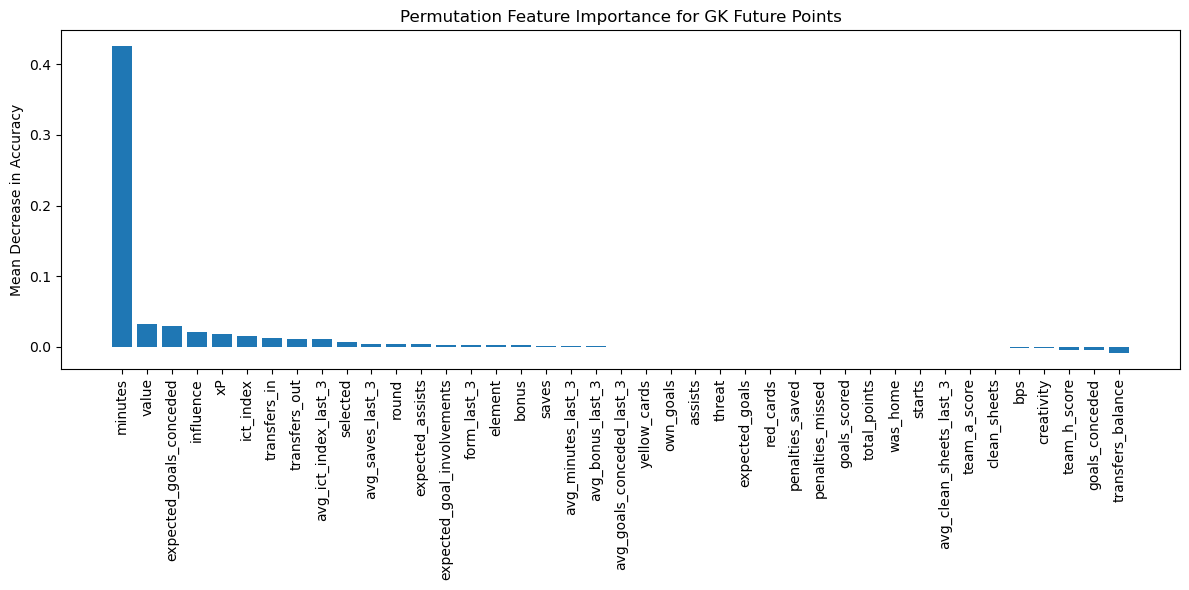


📊 Top 10 Most Important Features:
minutes: 0.4265
value: 0.0318
expected_goals_conceded: 0.0291
influence: 0.0209
xP: 0.0185
ict_index: 0.0154
transfers_in: 0.0117
transfers_out: 0.0112
avg_ict_index_last_3: 0.0106
selected: 0.0060


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

# 🔹 Drop tracking/categorical columns not usable directly
drop_cols = ['name', 'team', 'opponent_team', 'kickoff_time', 'fixture', 'season', 'gameweek', 'position']
gk_df = gk_df.drop(columns=drop_cols, errors='ignore')

# 🔹 Drop rows with missing values (especially due to rolling averages)
gk_df = gk_df.dropna()

# 🔹 Split into features and target
X = gk_df.drop(columns=['future_points'])
y = gk_df['future_points']

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 🔹 Compute permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# 🔹 Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Permutation Feature Importance for GK Future Points")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Mean Decrease in Accuracy")
plt.tight_layout()
plt.show()

# 🔹 Print top 10 features
print("\n📊 Top 10 Most Important Features:")
for i in indices[:10]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")



In [11]:
gk_df.corr(numeric_only=True)['future_points'].sort_values(ascending=False)

future_points                 1.000000
minutes                       0.647396
starts                        0.573084
bps                           0.555886
xP                            0.521118
influence                     0.520048
ict_index                     0.519070
saves                         0.506561
total_points                  0.481688
value                         0.476245
expected_goals_conceded       0.459435
goals_conceded                0.437800
selected                      0.423034
transfers_in                  0.330726
transfers_out                 0.317634
clean_sheets                  0.299077
bonus                         0.215101
yellow_cards                  0.160513
creativity                    0.096144
transfers_balance             0.090181
penalties_saved               0.076422
expected_assists              0.063811
own_goals                     0.059827
assists                       0.057776
expected_goal_involvements    0.056989
form_last_3              

In [13]:
gk_df.drop(['expected_goal_involvements', 'expected_goals','penalties_missed','goals_scored','red_cards','round','element','team_a_score',
       'team_h_score','was_home','threat'],axis=1,inplace=True)

In [14]:
gk_df.columns

Index(['xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'ict_index', 'influence', 'minutes', 'own_goals',
       'penalties_saved', 'saves', 'selected', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'yellow_cards', 'expected_assists', 'expected_goals_conceded', 'starts',
       'future_points', 'avg_saves_last_3', 'avg_clean_sheets_last_3',
       'avg_goals_conceded_last_3', 'avg_minutes_last_3',
       'avg_ict_index_last_3', 'avg_bonus_last_3', 'form_last_3'],
      dtype='object')

In [16]:
gk_df.head()

,xP,assists,bonus,bps,clean_sheets,creativity,goals_conceded,ict_index,influence,minutes,own_goals,penalties_saved,saves,selected,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,expected_assists,expected_goals_conceded,starts,future_points,avg_saves_last_3,avg_clean_sheets_last_3,avg_goals_conceded_last_3,avg_minutes_last_3,avg_ict_index_last_3,avg_bonus_last_3,form_last_3
0,3.6,0,0,25,1,0.0,0,1.9,19.0,90,0,0,2,1128297,6,0,0,0,50,0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,90.0,1.9,0.0,6.0
56,4.0,0,0,10,0,0.0,2,1.2,11.6,90,0,0,1,1369348,1,31287,93632,62345,50,0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,5.3,0,0,20,1,0.0,0,0.8,7.6,90,0,0,1,1366505,6,-61359,88334,149693,50,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,4.8,0,0,12,0,0.0,1,1.9,18.8,90,0,0,2,1422476,2,-12169,88190,100359,50,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,3.9,0,0,13,0,0.0,1,1.7,17.4,90,0,0,2,1407588,2,-53340,48276,101616,50,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('fpl_gk_data.csv')

In [3]:
df.columns

Index(['season', 'gameweek', 'name', 'position', 'team', 'xP', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'starts', 'future_points'],
      dtype='object')

In [4]:
df.drop(['expected_goal_involvements', 'expected_goals','penalties_missed','goals_scored','red_cards','round','element','team_a_score',
       'team_h_score','was_home','threat'],axis=1,inplace=True)

In [5]:
df.to_csv('fpl_gk_data.csv',index=False)
print("File saved successfully")

File saved successfully


# ML Model

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('fpl_gk_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   8808 non-null   object 
 1   gameweek                 8808 non-null   int64  
 2   name                     8808 non-null   object 
 3   position                 8808 non-null   object 
 4   team                     8808 non-null   object 
 5   xP                       8808 non-null   float64
 6   assists                  8808 non-null   int64  
 7   bonus                    8808 non-null   int64  
 8   bps                      8808 non-null   int64  
 9   clean_sheets             8808 non-null   int64  
 10  creativity               8808 non-null   float64
 11  fixture                  8808 non-null   int64  
 12  goals_conceded           8808 non-null   int64  
 13  ict_index                8808 non-null   float64
 14  influence               

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# 🔹 Load your cleaned dataset
gk_df = pd.read_csv("fpl_gk_data.csv")

# 🔹 Drop non-model-useful columns
gk_df = gk_df.drop(columns=['season', 'name', 'position', 'team', 'kickoff_time'])

# 🔹 Drop NaNs due to rolling features
gk_df = gk_df.dropna()

# 🔹 Sort by time (so future rows don't leak into training)
gk_df = gk_df.sort_values(by=['gameweek']).reset_index(drop=True)

# ✅ Time-based split: train on GWs 1–30, test on GWs 31–38
train_df = gk_df[gk_df['gameweek'] <= 30]
test_df  = gk_df[gk_df['gameweek'] > 30]

# 🔹 Split into features and target
X_train = train_df.drop(columns=['future_points'])
y_train = train_df['future_points']

X_test = test_df.drop(columns=['future_points'])
y_test = test_df['future_points']

from sklearn.model_selection import RandomizedSearchCV

# Define model
model = HistGradientBoostingRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [15, 31, 63],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [10, 20, 30, 50],
    'l2_regularization': [0.0, 0.1, 0.5, 1.0]
}

# Randomized search with 5-fold CV on training data
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=30,
                            scoring='neg_mean_absolute_error', cv=5,
                            random_state=42, n_jobs=-1, verbose=1)

# Fit on training data only
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_
print("✅ Best Params:", search.best_params_)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Test MAE: {mae:.4f}")
print(f"📈 Test R² Score: {r2:.4f}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best Params: {'min_samples_leaf': 50, 'max_leaf_nodes': 15, 'max_iter': 100, 'max_depth': 3, 'learning_rate': 0.1, 'l2_regularization': 0.1}

📊 Test MAE: 0.6449
📈 Test R² Score: 0.3844


In [7]:
# 🔹 Load original GK data (with names and team info)
original_gk_df = pd.read_csv("fpl_gk_data.csv")

# ✅ Step 1: Select a target gameweek (you can change this)
target_gameweek = 32

# ✅ Step 2: Filter test set for that gameweek
test_gw = test_df[test_df['gameweek'] == target_gameweek].copy()

# ✅ Step 3: Predict using best_model
test_gw['predicted_points'] = best_model.predict(test_gw.drop(columns=['future_points']))

# ✅ Step 4: Merge with original data to get 'name'
# We'll use gameweek + fixture + opponent_team + value as composite key (best-effort match)
test_gw_merged = test_gw.merge(
    original_gk_df[['gameweek', 'fixture', 'opponent_team', 'value', 'name']],
    on=['gameweek', 'fixture', 'opponent_team', 'value'],
    how='left'
)

# ✅ Step 5: Select and display top 10
top_10 = test_gw_merged.sort_values(by='predicted_points', ascending=False).head(10)
result_df = top_10[['name', 'gameweek', 'predicted_points', 'future_points']]

print(f"\n🎯 Top 10 GK Predictions for Gameweek {target_gameweek}")
print(result_df.to_string(index=False))



🎯 Top 10 GK Predictions for Gameweek 32
                    name  gameweek  predicted_points  future_points
         Jordan Pickford        32          4.378616            1.0
               Nick Pope        32          4.043951            3.0
       Kepa Arrizabalaga        32          4.043739            6.0
Emiliano Martínez Romero        32          3.881869            9.0
       David Raya Martin        32          3.795433            6.0
       David Raya Martin        32          3.795433            1.0
       David Raya Martin        32          3.795433            1.0
       David Raya Martin        32          3.795433            6.0
         Jordan Pickford        32          3.770706            1.0
              Bernd Leno        32          3.766245            9.0


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


gk_df = pd.read_csv("fpl_gk_data.csv")

# 🔹 Drop non-model-useful columns
gk_df = gk_df.drop(columns=['season', 'name', 'position', 'team', 'kickoff_time'])

# 🔹 Drop NaNs due to rolling features
gk_df = gk_df.dropna()

# 🔹 Sort by time (so future rows don't leak into training)
gk_df = gk_df.sort_values(by=['gameweek']).reset_index(drop=True)

# ✅ Time-based split: train on GWs 1–30, test on GWs 31–38
train_df = gk_df[gk_df['gameweek'] <= 30]
test_df  = gk_df[gk_df['gameweek'] > 30]

# 🔹 Split into features and target
X_train = train_df.drop(columns=['future_points'])
y_train = train_df['future_points']

X_test = test_df.drop(columns=['future_points'])
y_test = test_df['future_points']


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "HistGradient":HistGradientBoostingRegressor(min_samples_leaf= 50, max_leaf_nodes= 15, max_iter= 150, max_depth= 3, learning_rate= 0.1, l2_regularization= 0.1)
}

# ===============================
# Train & Evaluate
# ===============================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R²": round(r2, 4)
    })

# ===============================
# Show Results
# ===============================
results_df = pd.DataFrame(results).sort_values(by="MAE")
print("📊 Model Performance Comparison:")
print(results_df.to_string(index=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 24
[LightGBM] [Info] Start training from score 0.889217
📊 Model Performance Comparison:
            Model    MAE    MSE     R²
     HistGradient 0.6539 2.3852 0.3763
         CatBoost 0.6605 2.4580 0.3573
          XGBoost 0.6670 2.5256 0.3396
Linear Regression 0.6687 2.3063 0.3970
         LightGBM 0.6774 2.5744 0.3269
    Random Forest 0.7188 2.4679 0.3547


In [2]:
#Best model seems to be Linear regression with an R2 score of 0.397

In [6]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# 🔹 Parameter grid
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Ridge Regression Tuning
ridge_search = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, scoring='neg_mean_absolute_error', cv=5)
ridge_search.fit(X_train, y_train)
ridge_best = ridge_search.best_estimator_

# Lasso Regression Tuning
lasso_search = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas}, scoring='neg_mean_absolute_error', cv=5)
lasso_search.fit(X_train, y_train)
lasso_best = lasso_search.best_estimator_

# ElasticNet Tuning
elastic_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid={'alpha': alphas}, scoring='neg_mean_absolute_error', cv=5)
elastic_search.fit(X_train, y_train)
elastic_best = elastic_search.best_estimator_

# 🔹 Evaluate all three
models = {
    "Ridge": ridge_best,
    "Lasso": lasso_best,
    "ElasticNet": elastic_best
}

print("\n📊 Regularized Regression Performance:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:10} | MAE: {mae:.4f} | MSE: {mse:.4f} | R²: {r2:.4f} | Best alpha: {model.alpha}")


C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.88392e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.55231e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.5264e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.00077e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_ri


📊 Regularized Regression Performance:
Ridge      | MAE: 0.6609 | MSE: 2.2988 | R²: 0.3989 | Best alpha: 100
Lasso      | MAE: 0.6386 | MSE: 2.2931 | R²: 0.4004 | Best alpha: 0.1
ElasticNet | MAE: 0.6415 | MSE: 2.2955 | R²: 0.3998 | Best alpha: 0.1


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV


gk_df = pd.read_csv("fpl_gk_data.csv")

# 🔹 Drop non-model-useful columns
gk_df = gk_df.drop(columns=['season', 'name', 'position', 'team', 'kickoff_time'])

# 🔹 Drop NaNs due to rolling features
gk_df = gk_df.dropna()

# 🔹 Sort by time (so future rows don't leak into training)
gk_df = gk_df.sort_values(by=['gameweek']).reset_index(drop=True)

# ✅ Time-based split: train on GWs 1–30, test on GWs 31–38
train_df = gk_df[gk_df['gameweek'] <= 30]
test_df  = gk_df[gk_df['gameweek'] > 30]

# 🔹 Split into features and target
X_train = train_df.drop(columns=['future_points'])
y_train = train_df['future_points']

X_test = test_df.drop(columns=['future_points'])
y_test = test_df['future_points']


alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_search = GridSearchCV(Lasso(max_iter=100000), param_grid={'alpha': alphas}, scoring='neg_mean_absolute_error', cv=5)
lasso_search.fit(X_train, y_train)
model = lasso_search.best_estimator_
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"| MAE: {mae:.4f} | MSE: {mse:.4f} | R²: {r2:.4f} | Best alpha: {model.alpha}")


C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.307e+03, tolerance: 2.298e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.023e+03, tolerance: 2.358e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+03, to

| MAE: 0.6386 | MSE: 2.2931 | R²: 0.4004 | Best alpha: 0.1


In [5]:
#Best Model inferred to be Lasso regression best alpha 0.1 number of iterations 100000

In [8]:
import joblib

In [9]:
joblib.dump(model,'gk_model.pkl')

['gk_model.pkl']